In [12]:
import numpy as np

In [71]:
# Function to create a rotation matrix about the y-axis
def rotation_matrix_y(theta_degrees):
    theta = np.radians(theta_degrees)  # Convert angle from degrees to radians
    res =  np.array([
        [np.cos(theta), 0, np.sin(theta)],
        [0, 1, 0],
        [-np.sin(theta), 0, np.cos(theta)]
    ])
    return np.round(res, decimals=10)

In [14]:
# Q1 c)
rotate_90_degrees = rotation_matrix_y(90)
new_vector_1 = np.dot(rotate_90_degrees, np.array([1, 0, 0]))
new_vector_2 = np.dot(rotate_90_degrees, np.array([0, 1, 0]))
new_vector_3 = np.dot(rotate_90_degrees, np.array([0, 0, 1]))
print(new_vector_1, new_vector_2, new_vector_3)

[ 0.  0. -1.] [0. 1. 0.] [1. 0. 0.]


In [15]:
# Q3 b)

# Function to create a homogenous transformation matrix based on DH parameters
def dh_transformation_matrix(a, alpha, d, theta):
    alpha_rad = np.radians(alpha)
    theta_rad = np.radians(theta)
    
    A = np.array([
        [np.cos(theta_rad), -np.sin(theta_rad) * np.cos(alpha_rad), np.sin(theta_rad) * np.sin(alpha_rad), a * np.cos(theta_rad)],
        [np.sin(theta_rad), np.cos(theta_rad) * np.cos(alpha_rad), -np.cos(theta_rad) * np.sin(alpha_rad), a * np.sin(theta_rad)],
        [0, np.sin(alpha_rad), np.cos(alpha_rad), d],
        [0, 0, 0, 1]
    ])
    
    return np.round(A, decimals=10)

def forward_kinematics(theta1,theta2,theta3):
   
   
    # Compute individual transformation matrices
    A1 = dh_transformation_matrix(1, 0, 0, theta1)
    A2 = dh_transformation_matrix(1, 0, 0, theta2)
    A3 = dh_transformation_matrix(1, 0, 0, theta3)
    
    return np.dot(np.dot(A1, A2), A3)
    

In [16]:
result = forward_kinematics(0, 0, 0)
print(result)


[[1. 0. 0. 3.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [17]:
result = forward_kinematics(0, 90, 90)
print(result)


[[-1.  0.  0.  0.]
 [ 0. -1.  0.  1.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


In [18]:
# Q4 b)

import numpy as np

#  Fuction to calculate theta2 values - inverse kinematics
def calc_theta2(a1, a2, x, y):
    cos_theta2 = (x**2 + y**2 - a1**2 - a2**2) / (2 * a1 * a2)
    
    # Ensure the value is within the valid range for arccos
    cos_theta2 = np.clip(cos_theta2, -1.0, 1.0)
    
    # Calculate the two possible values for theta2
    theta2_pos = np.arccos(cos_theta2)
    theta2_neg = -np.arccos(cos_theta2)
    
    return theta2_pos, theta2_neg

#  Fuction to calculate theta1 values - inverse kinematics
def calc_theta1(a1, a2, x, y, theta2):
    # Step 1: Calculate phi
    phi = np.arctan2(y, x)
    
    # Step 2: Calculate psi
    psi = np.arctan2(a2 * np.sin(theta2), a1 + a2 * np.cos(theta2))
    
    # Step 3: Calculate theta1
    theta1 = phi - psi
    
    return theta1

# Function to calculate theta1 and theta2 values for a given set of coordinates
def combined(a1, a2, x, y):
    theta2_pos, theta2_neg = calc_theta2(a1, a2, x, y)
    theta1_pos = calc_theta1(a1, a2, x, y, theta2_pos)
    theta1_neg = calc_theta1(a1, a2, x, y, theta2_neg)
    
    return theta1_pos, theta1_neg, theta2_pos, theta2_neg

# Function to calculate theta1 and theta2 values for a list of coordinates
def combined_for_list(a1, a2, coordinates):
    results = []
    for (x, y) in coordinates:
        theta1_pos, theta1_neg, theta2_pos, theta2_neg = combined(a1, a2, x, y)
        results.append({
            'x': x,
            'y': y,
            'theta1_pos': theta1_pos,
            'theta1_neg': theta1_neg,
            'theta2_pos': theta2_pos,
            'theta2_neg': theta2_neg
        })
    return results


In [19]:
a1 = 2 
a2 = 2
x = 0
y = 4

theta1_pos, theta1_neg, theta2_pos, theta2_neg = combined(a1, a2, x, y)

print(f"set one: {np.degrees(theta1_pos)}, {np.degrees(theta2_pos)} degrees")
print(f"set two: {np.degrees(theta1_neg)}, {np.degrees(theta2_neg)} degrees")

set one: 90.0, 0.0 degrees
set two: 90.0, -0.0 degrees


Coordinates: (1, 3)
Set one: 33.80380727004295, 75.52248781407008 degrees
Set two: 109.32629508411303, -75.52248781407008 degrees

Coordinates: (2, 1)
Set one: -29.447105241443097, 112.02431283704216 degrees
Set two: 82.57720759559906, -112.02431283704216 degrees

Coordinates: (1, 1)
Set one: -24.295188945364572, 138.59037789072914 degrees
Set two: 114.29518894536457, -138.59037789072914 degrees

Coordinates: (3, 2)
Set one: 8.031161252724504, 51.31781254651057 degrees
Set two: 59.34897379923507, -51.31781254651057 degrees



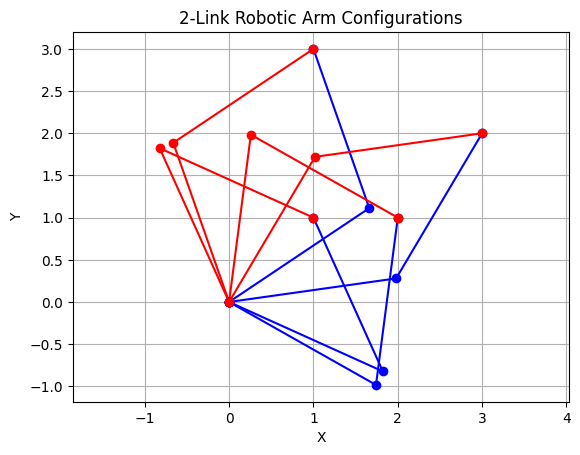

In [75]:
# Q4 b) continued

import matplotlib.pyplot as plt

# Function to plot the robotic arm
def plot_arm(a1, a2, theta1, theta2, color='b'):
    # Calculate the positions of the joints
    x0, y0 = 0, 0
    x1 = a1 * np.cos(theta1)
    y1 = a1 * np.sin(theta1)
    x2 = x1 + a2 * np.cos(theta1 + theta2)
    y2 = y1 + a2 * np.sin(theta1 + theta2)
    
    # Plot the arm
    plt.plot([x0, x1, x2], [y0, y1, y2], color=color, marker='o')

# Available coordinates A to D
coordinates = [(1, 3), (2, 1), (1, 1), (3, 2)]
results = combined_for_list(a1, a2, coordinates)

plt.figure()
for result in results:
    print(f"Coordinates: ({result['x']}, {result['y']})")
    print(f"Set one: {np.degrees(result['theta1_pos'])}, {np.degrees(result['theta2_pos'])} degrees")
    print(f"Set two: {np.degrees(result['theta1_neg'])}, {np.degrees(result['theta2_neg'])} degrees")
    print()
    
    # Plot both configurations
    plot_arm(a1, a2, result['theta1_pos'], result['theta2_pos'], color='b')
    plot_arm(a1, a2, result['theta1_neg'], result['theta2_neg'], color='r')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('2-Link Robotic Arm Configurations')
plt.grid(True)
plt.axis('equal')
plt.show()


In [77]:
# 4 b) continued - trajectory planning
# Function to solve polynomial equations
def solve_cubic_polynomial(t0, t1, q_start, q_end, v_start=0, v_end=0):
    conditions_matrix = np.array([
        [1, t0, t0**2, t0**3],
        [0, 1, 2*t0, 3*t0**2],
        [1, t1, t1**2, t1**3],
        [0, 1, 2*t1, 3*t1**2]
    ])    

    values_vector = np.array([q_start, v_start, q_end, v_end])
    
    # Solve for coefficients [a0, a1, a2, a3]
    coeffs = np.linalg.solve(conditions_matrix, values_vector)
    return coeffs

In [37]:
# Theta1 values for each point
theta_ones = [
    90.0,    
    109.33,  
    82.58,  
    114.3, 
    59.35 
]

# Theta2 values for each point
theta_twos = [
    0,       
    -75.52,  
    -112.02, 
    -138.59, 
    -51.32 
]

# Time intervals for each segment
time_intervals = [0, 1, 2, 3, 4] 

In [59]:
import pandas as pd

# Solving the polynomial for segment 1
coeffs_list_one = []
for i in range(len(theta_ones) - 1):
    q_start = theta_ones[i]
    q_end = theta_ones[i + 1]
    t0, t1 = time_intervals[i], time_intervals[i + 1]
    coeffs = solve_cubic_polynomial(t0, t1, q_start, q_end)
    coeffs_list_one.append(coeffs)
    
    
# Convert the list of coefficients to a DataFrame
df = pd.DataFrame(coeffs_list_one, columns=['a0', 'a1', 'a2', 'a3'])

# Print the DataFrame as a table
print(df)

        a0       a1       a2      a3
0    90.00     0.00    57.99  -38.66
1   -24.42   321.00  -240.75   53.50
2   970.74 -1141.92   475.80  -63.44
3 -4336.65  3956.40 -1153.95  109.90


In [43]:
import pandas as pd

# Solving the polynomial for segment 2
coeffs_list_two = []
for i in range(len(theta_twos) - 1):
    q_start = theta_twos[i]
    q_end = theta_twos[i + 1]
    t0, t1 = time_intervals[i], time_intervals[i + 1]
    coeffs = solve_cubic_polynomial(t0, t1, q_start, q_end)
    coeffs_list_two.append(coeffs)

# Convert the list of coefficients to a DataFrame
df = pd.DataFrame(coeffs_list_two, columns=['a0', 'a1', 'a2', 'a3'])

# Print the DataFrame as a table
print(df)

        a0       a1       a2      a3
0     0.00     0.00  -226.56  151.04
1  -258.02   438.00  -328.50   73.00
2  -855.98   956.52  -398.55   53.14
3  6930.28 -6283.44  1832.67 -174.54


In [78]:
# 4 c)
# Function to plot the angular position for a given arm
def plot_position(coeffs, t_start, t_end):
    a0, a1, a2, a3 = coeffs
    t = np.linspace(t_start, t_end, 100)
    
    q = a0 + a1 * t + a2 * t**2 + a3 * t**3
    q_dot = a1 + 2 * a2 * t + 3 * a3 * t**2
    
    plt.plot(t, q, label=f'Angular Position (Segment {t_start}-{t_end})')

In [61]:
# Function to plot the angular velocity for a given arm
def plot_velocity(coeffs, t_start, t_end):
    a0, a1, a2, a3 = coeffs
    t = np.linspace(t_start, t_end, 100)
    
    q = a0 + a1 * t + a2 * t**2 + a3 * t**3
    q_dot = a1 + 2 * a2 * t + 3 * a3 * t**2
    
    plt.plot(t, q_dot, label=f'Angular Velocity (Segment {t_start}-{t_end})')

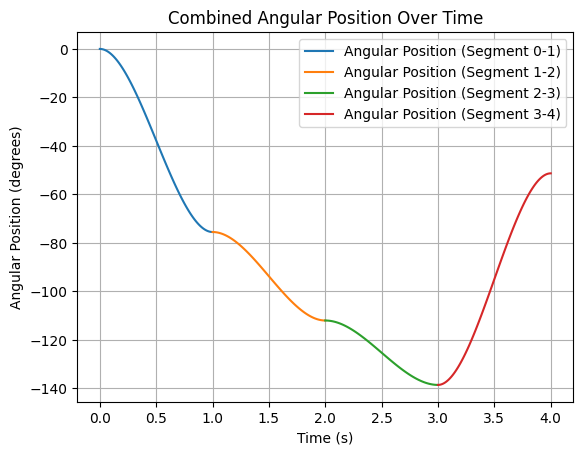

In [64]:
plt.figure()

for i in range(len(coeffs_list_two)):
    t_start, t_end = time_intervals[i], time_intervals[i + 1]
    plot_position(coeffs_list_two[i], t_start, t_end)


plt.xlabel('Time (s)')
plt.ylabel('Angular Position (degrees)')
plt.title('Combined Angular Position Over Time')
plt.legend()
plt.grid(True)
plt.show()



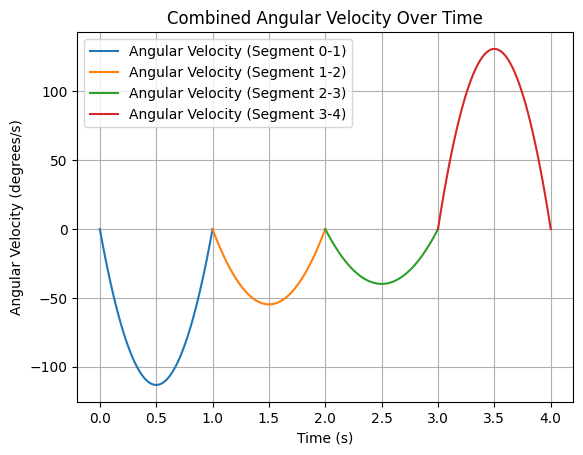

In [66]:
plt.figure()

for i in range(len(coeffs_list_two)):
    t_start, t_end = time_intervals[i], time_intervals[i + 1]
    plot_velocity(coeffs_list_two[i], t_start, t_end)

# Configure the final combined plot for angular velocity
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (degrees/s)')
plt.title('Combined Angular Velocity Over Time')
plt.legend()
plt.grid(True)
plt.show()

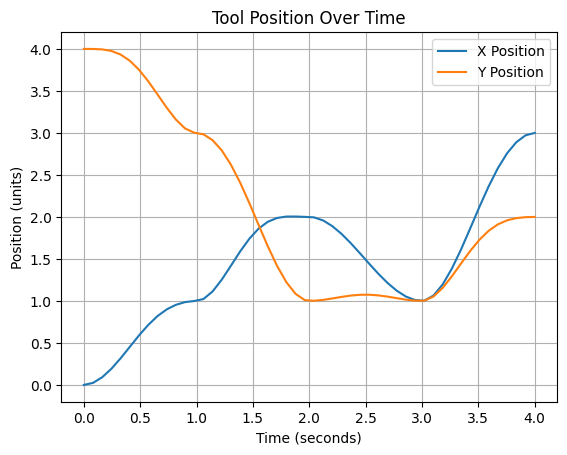

In [69]:
# Function to compute the cubic polynomial value for a given time t
def cubic_polynomial(coeffs, t):
    a0, a1, a2, a3 = coeffs
    return a0 + a1 * t + a2 * t**2 + a3 * t**3

# Generate time points for plotting (0 to 4 seconds)
time = np.linspace(0, 4, 50)

# Arrays to store the tool positions
x_positions = []
y_positions = []

# link lengths
a1 =2
a2 =2
        
for t in time:
    
    # find the segment based on time
    if t < 1:
        segment = 0
    elif t < 2:
        segment = 1
    elif t < 3:
        segment = 2
    else:
        segment = 3
        
        
    # identify the theta values for the segment
    theta1 = cubic_polynomial(coeffs_list_one[segment], t)
    theta2 = cubic_polynomial(coeffs_list_two[segment], t)
    
    # Convert to radians
    theta1_rad = np.radians(theta1)
    theta2_rad = np.radians(theta2)
    
    # Calculate the tool position using forward kinematics equations
    x = a1 * np.cos(theta1_rad) + a2 * np.cos(theta1_rad + theta2_rad)
    y = a1 * np.sin(theta1_rad) + a2 * np.sin(theta1_rad + theta2_rad)
    
    # save the positions
    x_positions.append(x)
    y_positions.append(y)

# Plotting the tool trajectory
plt.figure()
plt.plot(time, x_positions, label='X Position')
plt.plot(time, y_positions, label='Y Position')
plt.title("Tool Position Over Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Position (units)")
plt.legend()
plt.grid(True)
plt.show()
